# New Section

Daegu Apartment


### **Business Problem Understanding**

**Context**

Apartemen menjadi salah satu solusi hunian bagi masyarakat modern, terutama di kota-kota besar seperti Daegu, di mana lahan terbatas dan aktivitas bisnis padat. Harga apartemen dipengaruhi oleh berbagai faktor internal, seperti luas apartemen, fasilitas di dalam unit, serta faktor eksternal, seperti lokasi dekat transportasi umum dan fasilitas sekitar.

Pemilik apartemen atau developer yang ingin menjual unit mereka perlu menetapkan harga yang sesuai dengan pasar. Jika harga terlalu tinggi dibandingkan dengan pasar, apartemen sulit terjual. Sebaliknya, jika harga terlalu rendah, pemilik kehilangan potensi keuntungan. Oleh karena itu, prediksi harga apartemen yang akurat sangat penting untuk membantu pemilik menetapkan harga jual yang optimal.

**Problem Statement**

Salah satu tantangan terbesar bagi pemilik apartemen adalah menentukan harga jual yang kompetitif namun tetap menguntungkan. Menetapkan harga secara manual berdasarkan intuisi atau perbandingan terbatas dengan apartemen lain berisiko menghasilkan harga yang tidak optimal.


**Permasalahan utama:** bagaimana cara membantu pemiliki apartemen di Daegu untuk menetapkan harga yang tepat berdasarkan fitur-fitur properti yang tersedia, sehingga harga tetap kompetitif di pasar dan mendapatkan keuntungan optimal?

**Goals**

Berdasarkan permasalahan tersebut, tujuan dari analisis ini adalah membangun model prediksi harga apartemen di Daegu. Model ini diharapkan mampu:



*   Membantu pemilik apartemen menentukan harga jual yang sesuai dengan kondisi pasar
*   Memperhitungkan berbagai fitur apartemen, seperti tipe koridor, luas unit, jumlah fasilitas, tahun dibangun, dan lokasi dekat stasiun subway.

*   Memberikan estimasi harga yang realistis untuk unit baru yang akan dijual


Dengan prediksi harga yang akurat, pemilik apartemen dapat membuat keputusan yang lebih baik terkait harga jual, meningkatkan kemungkinan transaksi, dan memaksimalkan keuntungan.

**Analytic Approach**


Langkah - langkah yang akan dilakukan adalah:



*   Eksplorasi data:menganalisis distribusi dan hubungan antar fitur dengan harga apartemen untuk menemukan pola yang penting
*   Preprocessing:mengubah fitur kategorikal menjadi numerik dan melakukan scaling agar model dapat bekerja optimal

*   Pemodelan regresi:membangun model prediksi harga menggunakan beberapa algoritma regresi, kemudian membandingkan performanya berdasarkan metrik evaluasi seperti RMSE, MAE, dan MAPE.
*   Evaluasi dan pengembangan model:menentukan model terbaik, menganalisis error, dan memberikan rekomendasi perbaikan agar prediksi lebih akurat di masa mendatang.





**Data Understanding**

In [ ]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload(  )

Saving data_daegu_apartment.csv to data_daegu_apartment (2).csv


In [ ]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### Ekploratory Data Analysis

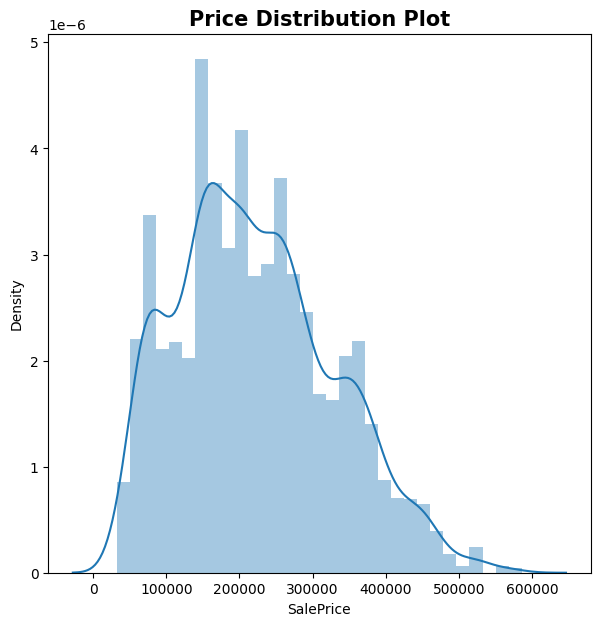

In [ ]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Berdasarkan pola distribusi SalePrice menunjukkan bahwa harga apartemen di Daegu cenderung membentuk pola mendekati distribusi normal, meskipun miring ke kanan (right skewed). Hal ini terlihat dari adanya ekor panjang di sisi harga yang lebih tinggi.Kemiringan ke kanan mengindikasikan bahwa meskipun banyak apartemen berharga menengah, terdapat sejumlah kecil apartemen mewah atau berukuran besar yang memiliki harga jauh lebih tinggi dibandingkan mayoritas unit lainnya.

In [ ]:
# Cek jumlah apartemen berdasarkan tipe dan stasiun terdekat
print("Jumlah per HallwayType:")
print(df['HallwayType'].value_counts())

print("\nJumlah per SubwayStation:")
print(df['SubwayStation'].value_counts())

Jumlah per HallwayType:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

Jumlah per SubwayStation:
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64


Distribusi tipe lorong (HallwayType) pada dataset menunjukkan bahwa mayoritas apartemen menggunakan tipe terraced (2528 unit). Hal ini mengindikasikan bahwa model hunian dengan lorong terbuka atau setengah-terbuka lebih umum ditemukan pada apartemen di Daegu.
Distribusi lokasi apartemen berdasarkan SubwayStation menunjukkan bahwa sebagian besar unit berada dekat Kyungbuk_uni_hospital station (1152 unit) dan Myung-duk station (1044 unit). Hal ini menggambarkan bahwa wilayah sekitar kedua stasiun tersebut merupakan area yang padat hunian apartemen.

In [ ]:
#Melihat kombinasi kategori
df.groupby(['SubwayStation', 'HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

In [ ]:
# Cek median price untuk tiap HallwayType dan SubwayStation
df_median_price = (df.groupby(['SubwayStation','HallwayType'])['SalePrice'].median().sort_values(ascending=False))
df_median_price

,,SalePrice
SubwayStation,HallwayType,
Banwoldang,terraced,337168.0
Daegu,terraced,300884.0
Myung-duk,terraced,271681.0
Sin-nam,terraced,256637.0
Kyungbuk_uni_hospital,terraced,244911.0
no_subway_nearby,terraced,243362.0
Bangoge,mixed,167035.0
Kyungbuk_uni_hospital,corridor,163716.0
Myung-duk,mixed,149557.0




*   Terraced adalah HallwayType dengan harga median tertinggi di hampir semua lokasi stasiun
*   Corridor adalah HallwayType termurah

*   Kombinasi lokasi premium + HallwayType terraced memberikan harga tertinggi
*   Lokasi subwaystation juga sangat mempengaruhi harga





HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


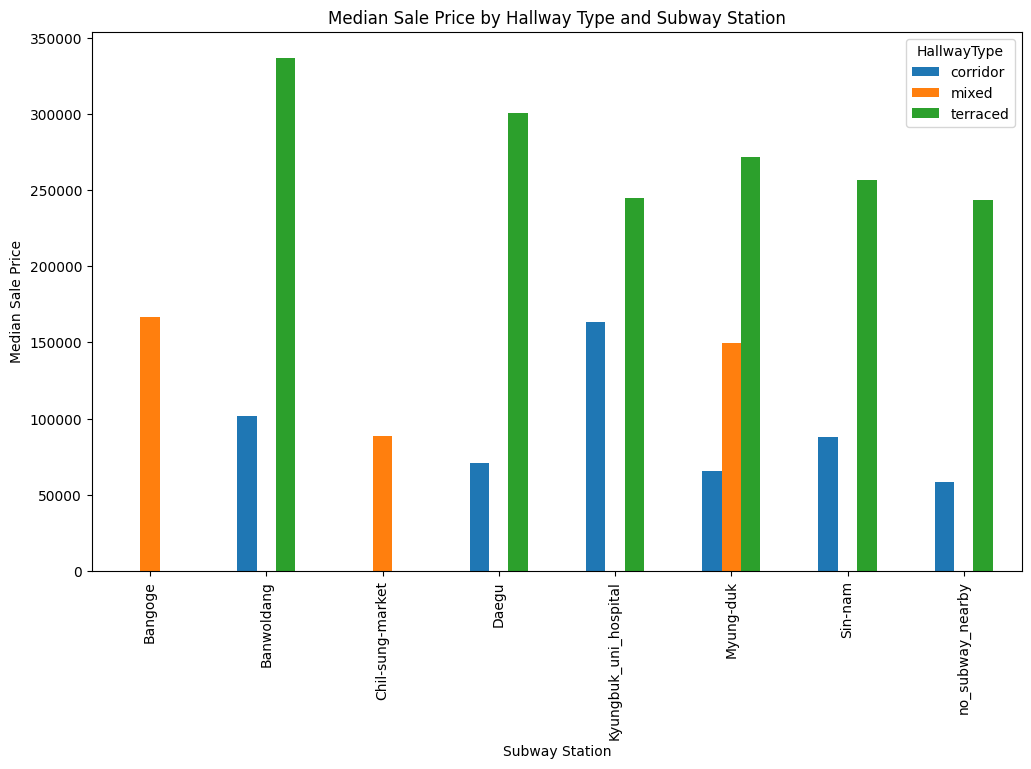

In [ ]:
# Plot harga median untuk tiap tipe HallwayType di setiap SubwayStation
daegu_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
display(daegu_pivot)

pivot_plot = daegu_pivot.plot.bar(stacked=False, figsize=(12, 7))
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Sale Price by Hallway Type and Subway Station');

Grafik diatas menunjukkan bagaimana harga median apartemen di Daegu berbeda berdasarkan jenis corridor (HallwayType) dan SubwayStation terdekat. Secara umum, apartemen dengan tipe terraced konsisten memiliki harga median tertinggi di hampir semua stasiun subway. Hal ini mengindikasikan bahwa tipe terraced merupakan tipe hunian yang cenderung lebih premium dibandingkan mixed atau corridor.
Grafik ini juga menunjukkan bahwa lokasi stasiun subway tertentu, seperti Banwoldang dan Kyungbuk Uni Hospital memiliki harga median yang lebih tinggi dibanding stasiun lain. Artinya, kedekatan dengan stasiun subway populer dan kawasan komersial di pusat kota menjadi faktor penting dalam menentukan nilai jual apartemen.

### Location

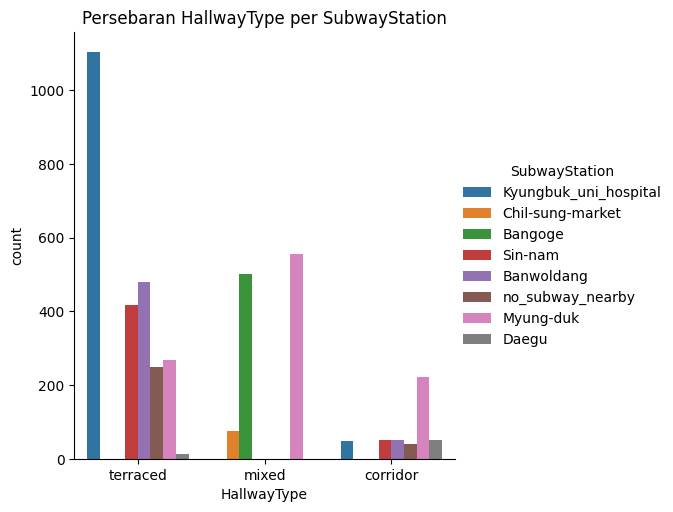

In [ ]:
# Persebaran HallwayType berdasarkan SubwayStation
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df);
plt.title('Persebaran HallwayType per SubwayStation');

Grafik tersebut menunjukkan jumlah unit apartemen berdasarkan HallwayType di setiap SubwayStation terdekat di wilayah Daegu. Secara umum, terlihat bahwa tipe terraced merupakan yang paling dominan hampir di semua stasiun subway. Sementara itu tipe mixed memiliki persebaran yang lebih spesifik hanya di beberapa lokasi, dengan jumlah tertinggi pada stasiun Myung-duk dan Bangoge. Untuk tipe corridor, persebarannya relatif kecil dan terbatas, namun tetap muncul di hampir semua stasiun, terutama di Myung-duk, Kyungbuk_uni_hospital dan Daegu. Ini menunjukkan bahwa apartemen dengan tipe corridor tertutup tidak terlalu umum di area ini.

### Data Preprocessing
Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah :


*   Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
*   Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.



In [ ]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [ ]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[terraced, corridor]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 5min~10min]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Banwoldang]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[0.0, 6.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 2.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[181.0, 605.0]"
7,YearBuilt,int64,0,0.0,16,"[2003, 1986]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[5, 7]"
9,Size(sqf),int64,0,0.0,89,"[138, 1519]"


Tabel diatas merupakan ringkasan karakteristik setiap fitur dalam dataset Daegu Apartment. Seluruh fitur tidak memiliki nilai kosong sehingga data bersih dan siap digunakan untuk analisis maupun pemodelan. Untuk setiap kolom ditampilkan tipe data, jumlah nilai unik, serta contoh dua nilai acak agar terlihat variasinya.

In [ ]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(1422)

Drop columns

Perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.



*   Jika ditinjau berdasar domain knowledge, fitur 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)' tidak memiliki relevansi dan kepentingan untuk analisis prediktif.




In [ ]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)'], axis=1, inplace=True)

In [ ]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HallwayType             4123 non-null   object 
 1   TimeToSubway            4123 non-null   object 
 2   SubwayStation           4123 non-null   object 
 3   N_Parkinglot(Basement)  4123 non-null   float64
 4   YearBuilt               4123 non-null   int64  
 5   N_FacilitiesInApt       4123 non-null   int64  
 6   Size(sqf)               4123 non-null   int64  
 7   SalePrice               4123 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 257.8+ KB


sekarang kolom 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBY(University)', 'N_FacilitiesNearBy(PublicOffice)' sudah tidak ada

In [ ]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


Deskripsi statistik pada fitur numerik dataset Daegu Apartment menunjukkan bahwa seluruh data berada dalam kondisi lengkap tanpa missing values.

In [ ]:
# Cek harga sewa yang bernilai 0
df_model[df_model['SalePrice'] == 0]['SalePrice'].count()

np.int64(0)

### Data Correlation

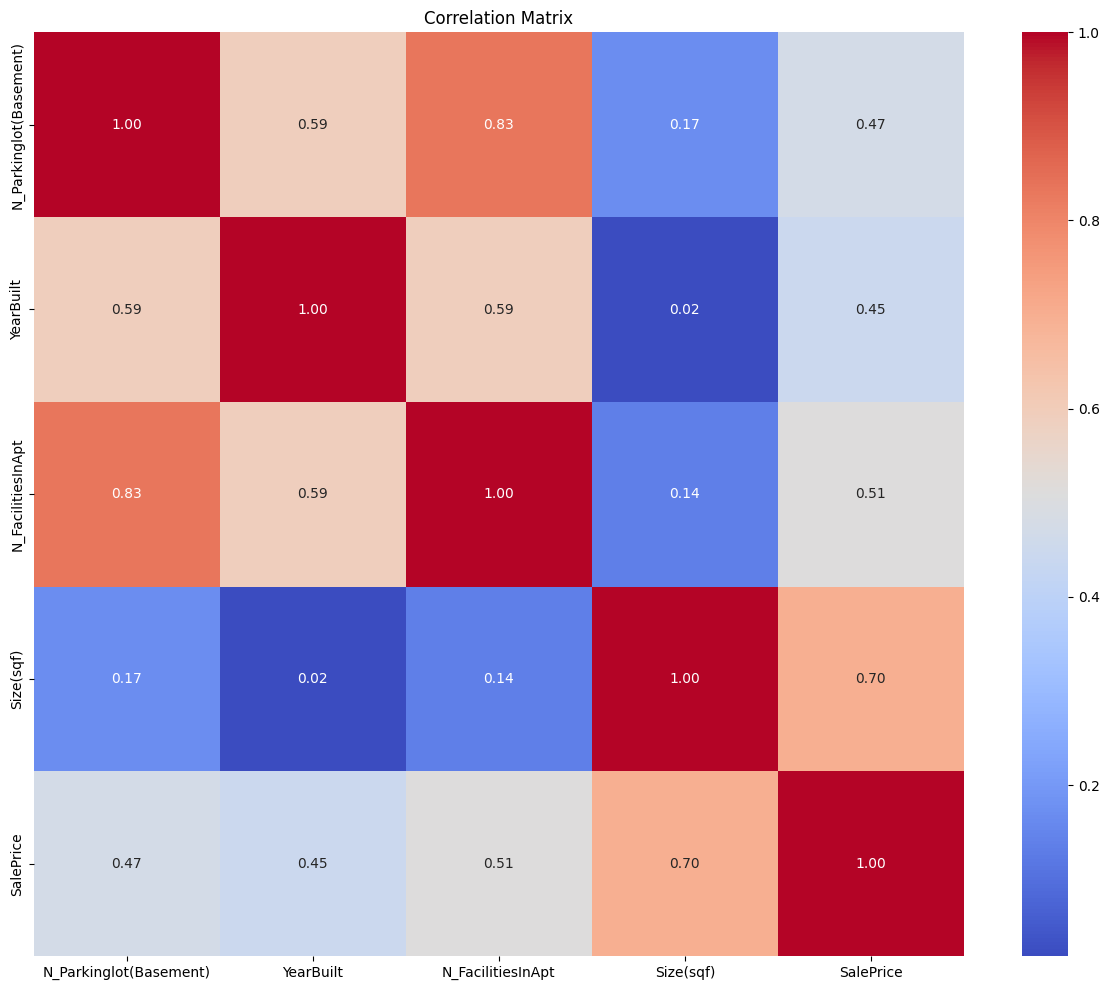

In [ ]:
num_df = df_model.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr(method='pearson')

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Heatmap korelasi ini menunjukkan seberapa kuat hubungan antar fitur numerik dalam dataset daegu apartment. Warna yang semakin merah menandakan korelasi positif yang semakin kuat, sedangkan warna biru menunjukkan korelasi yang lebih lemah atau mendekati nol. Hasilnya, menunjukkan bahwa Size(sqf) memiliki korelasi paling kuat terhadap SalePrice (0.70), artinya ukuran apartemen adalah faktor paling berpengaruh terhadap harga jual. Selain itu, N_FacilitiesInApt juga memiliki hubungan cukup kuat dengan harga (0.51), yang berarti semakin banyak fasilitas dalam apartemen, semakin tinggi harga jualnya. Fitur YearBuilt dan N_Parkinglot(Basement) memiliki korelasi sedang terhadap harga (0.45 dan 0.47), menunjukkan bahwa bangunan yang lebih baru dan jumlah parkir basement juga berkontribusi terhadap nilai properti, meskipun pengaruhnya tidak sebesar ukuran atau fasilitas.

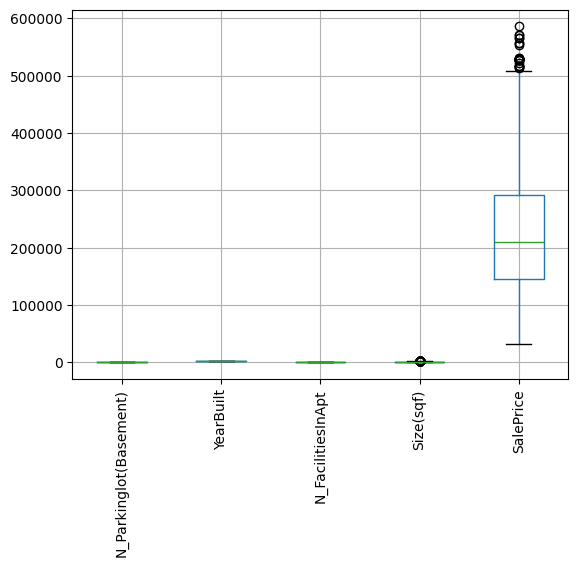

In [ ]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Variabel non-harga (N_ParkingLot, YearBuilt, N_FacilitiesinApt, Size(sqf)) memiliki sebaran yang sangat kecil pada skala y, ini menunjukkan bahwa rentang nilainya jauh lebih kecil dibandingkan dengan SalePrice. Mereka cenderung tidak memiliki outlier yang ekstrem.
SalePrice : variabel ini menunjukkan variabilitas harga yang tinggi dan memiliki outlier positif yang signifikan, yang berarti ada properti yang dijual dengan harga jauh lebih tinggi daripada mayoritas properti lainnya dalam dataset daegu apartment.

In [ ]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [ ]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


In [ ]:
# Outliers pada fitur Size(sqf)
find_anomalies(df_model['Size(sqf)'])

IQR: 505.0
limit_bawah: -113.5
limit_atas: 1906.5


In [ ]:
# Outliers pada fitur N_FacilitiesInApt
find_anomalies(df_model['N_FacilitiesInApt'])

IQR: 3.0
limit_bawah: -0.5
limit_atas: 11.5


In [ ]:
# Outliers pada fitur YearBuilt
find_anomalies(df_model['YearBuilt'])

IQR: 15.0
limit_bawah: 1970.5
limit_atas: 2030.5


In [ ]:
# Outliers pada fitur N_Parkinglot(Basement)
find_anomalies(df_model['N_Parkinglot(Basement)'])

IQR: 614.0
limit_bawah: -737.0
limit_atas: 1719.0


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

### Price

In [ ]:
# Cek deskriptif statistik kolom SalePrice
df_model['SalePrice'].describe()

,SalePrice
count,4123.000000
mean,221767.926995
std,106739.839945
min,32743.000000
25%,144752.000000
50%,209734.000000
75%,291150.000000
max,585840.000000


In [ ]:
# Cek price > $510747.0
df_model[df_model['SalePrice'] > 510747.0].count()['SalePrice']

np.int64(27)

Dari hasil kode tersebut, ditemukan bahwa ada 27 listing yang memiliki harga (price) lebih besar dari 510747.0. Artinya, sebagian kecil properti yang memiliki harga cukup tinggi dibandingkan nilai ambang tersebut.

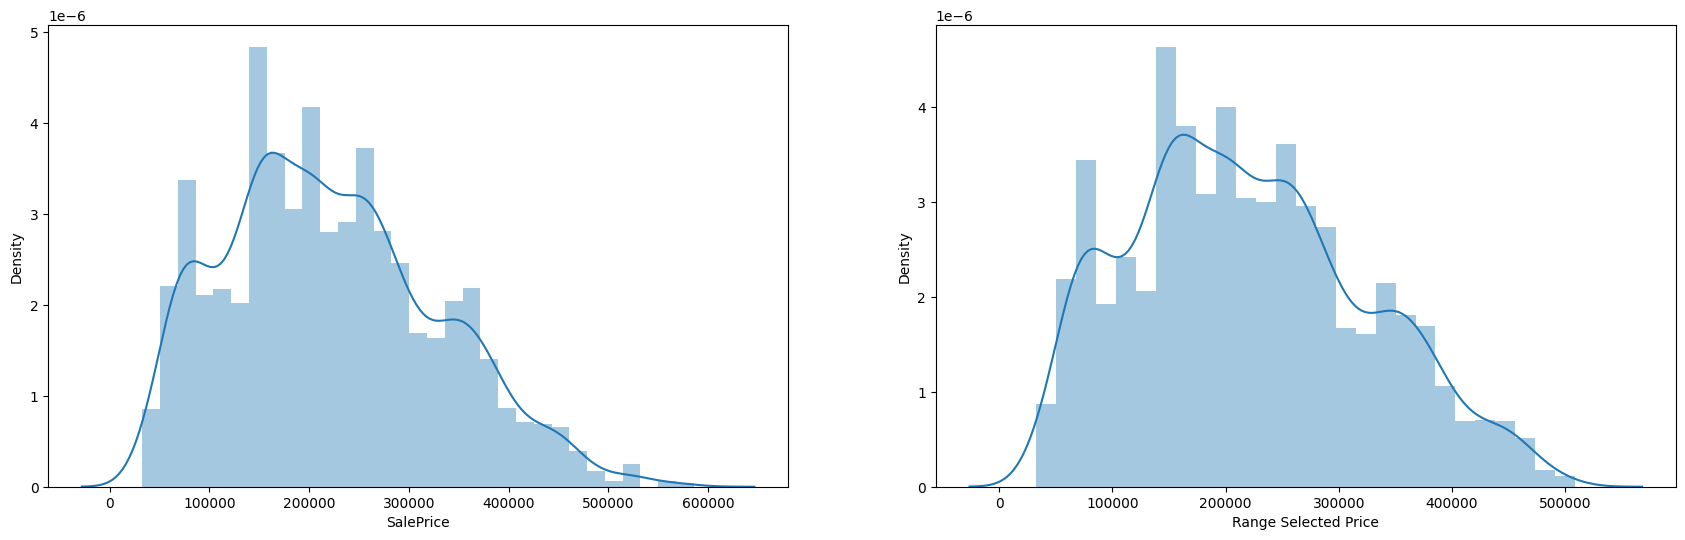

In [ ]:
# Melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 510747.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('SalePrice')
axes[1].set_xlabel('Range Selected Price');

In [ ]:
# Cek deskriptif statistik kolom 'SalePrice' setelah filtering
df_model['SalePrice'].describe()

,SalePrice
count,4096.000000
mean,219692.548828
std,103961.039574
min,32743.000000
25%,144752.000000
50%,207964.000000
75%,287610.000000
max,508849.000000


Setelah dilakukan filtering untuk membuang nilai SalePrice diatas 510747.0, dataset Daegu Apartment kini memiliki 4096 data. Nilai rata-rata (mean) harga apartemen adalah sekitar 219.692 dengan standar deviasi sebesar 103.961 yang menunjukkan variasi harga yang cukup besar antar properti. Harga termurah dalam data adalah 32.743, sementara harga tertinggi setelah filtering menjadi 508.849, masih berada dalam batas yang wajar berdasarkan perhitungan IQR sebelumnya. Nilai median sebesar 207.964 menunjukkan bahwa setengah dari apartemen  di dataset memiliki harga dibawah angka tersebut. Sementara itu, nilai kuartil 25% (144.752) dan kuartil 75% (287.610) menggambarkan rentang harga mayoritas apartemen berada pada kisaran tersebut.

In [ ]:
# Cek deskriptif statistik kolom Size(sqf)
df_model['Size(sqf)'].describe()

,Size(sqf)
count,4096.000000
mean,949.107178
std,378.608713
min,135.000000
25%,644.000000
50%,910.000000
75%,1131.000000
max,2337.000000


In [ ]:
# Cek jumlah Size(sqr) >1906.5
df_model[df_model['Size(sqf)'] > 1906.5].count()['Size(sqf)']

np.int64(81)

In [ ]:
# Memilih data dengan nilai Size(sqf) tidak lebih dari 1906.5
df_model = df_model[(df_model['Size(sqf)'] <= 1906.5)]

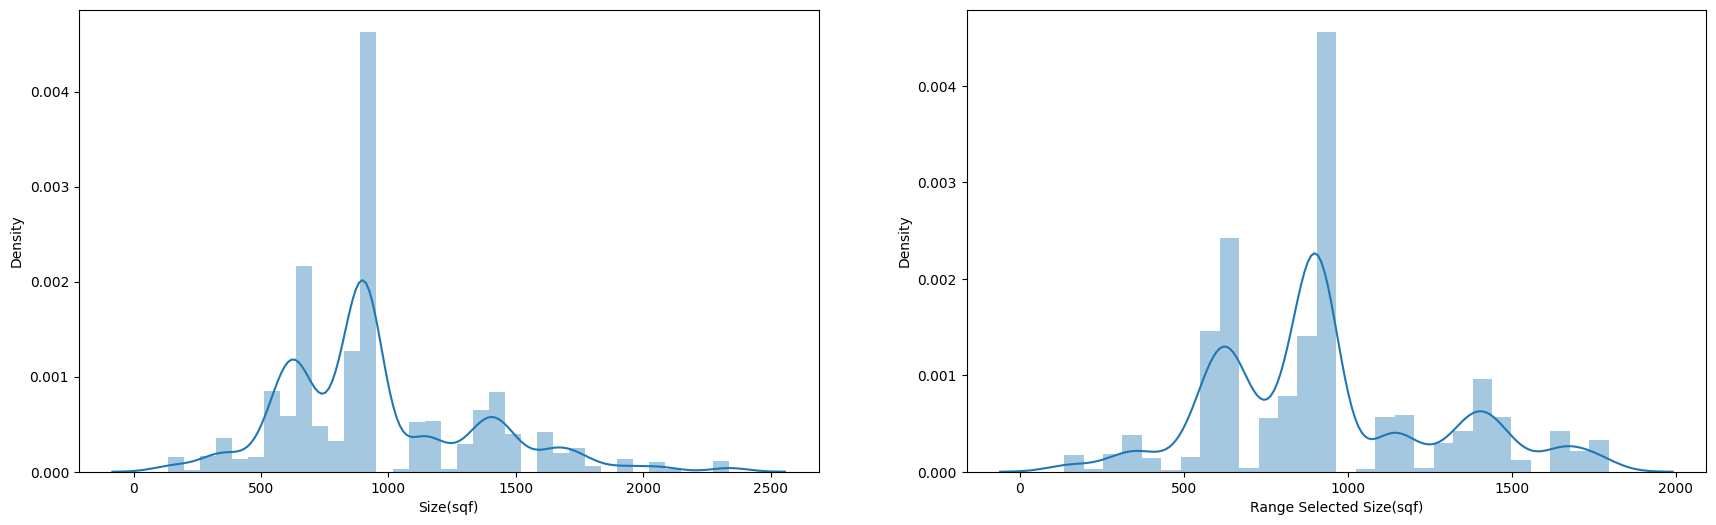

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Range Selected Size(sqf)');

In [ ]:
df_model['N_FacilitiesInApt'].describe()

,N_FacilitiesInApt
count,4015.000000
mean,5.794521
std,2.323784
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,10.000000


In [ ]:
# Cek jumlah N_FacilitiesInApt yang memiliki lebih dari 20 listing
len(df_model[df_model['N_FacilitiesInApt'] > 15])

0

In [ ]:
# Menerapkan limitasi data berdasar kolom 'N_FacilitiesInApt'
df_model = df_model[(df_model['N_FacilitiesInApt'] <= 15)]

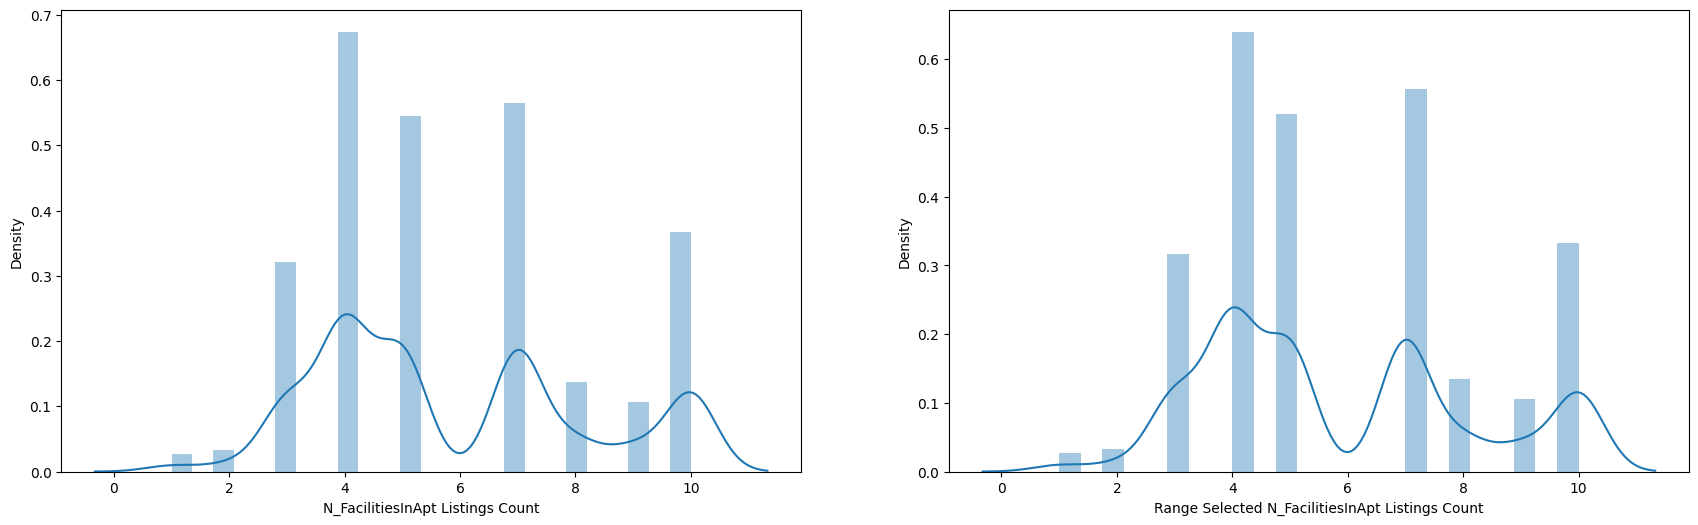

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['N_FacilitiesInApt'], ax=axes[0])
sns.distplot(df_model['N_FacilitiesInApt'], ax=axes[1])
axes[0].set_xlabel('N_FacilitiesInApt Listings Count')
axes[1].set_xlabel('Range Selected N_FacilitiesInApt Listings Count');

Plot kiri (distribusi awal) : distribusi ini terlihat multimodal (memiliki beberapa puncak). Puncak utama (mode) terlihat jelas di sekitar angka 4-5 fasilitas dan puncak kedua di sekitar 8 fasilitas. Namun, terdapat data yang menunjukkan properti memiliki 10 fasilitas. Karena variabel ini adalah hitungan (count), plot ini mencerminkan variasi yang luas dalam jumlah fasilitas yang ditawarkan.

Plot kanan (distribusi akhir) : jelas terlihat bahwa data telah dibatasi. Nilai maksimum data yang ditampilkan di plot ini hanya mencapai 4 fasilitas.Distribusi masih terlihat mulitmodal dengan puncak yang kini terfokus pada jumlah fasilitas 1, 2, 3. Ini menunjukkan bahwa properti dengan jumlah fasilitas tinggi (5 keatas) telah dikeluarkan atau dihilangkan dari dataframe yang baru

N_Parkinglot(Basement)

In [ ]:
df_model['N_Parkinglot(Basement)'].describe()

,N_Parkinglot(Basement)
count,4015.000000
mean,562.914321
std,408.514456
min,0.000000
25%,184.000000
50%,536.000000
75%,798.000000
max,1321.000000


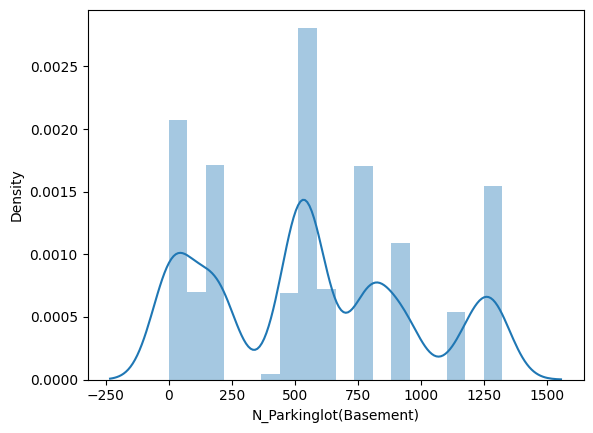

In [ ]:
# Plot distribusi fitur 'N_Parkinglot(Basement)'
sns.distplot(df_model['N_Parkinglot(Basement)']);

In [ ]:
# Cek jumlah data dengan nilai N_Parkinglot(Basement) = 0
df_model[df_model['N_Parkinglot(Basement)'] == 0].count()['N_Parkinglot(Basement)']

np.int64(485)

Terdapat 485 apartemen yang tidak memiliki basement parking. Fitur ini tidak relevan sebagai input untuk model yang bertujuan untuk memprediksi harga jual apartemen. Oleh karena itu fitur ini tidak akan dimasukkan ke dalam pemodelan.

Selanjutnya, kita akan men-drop fitur - fitur tersisa yang tidak dibutuhkan untuk pemodelan prediksi harga jual apartemen

In [ ]:
# Drop fitur 'N_Parkinglot(Basement)'
df_model = df_model.drop(columns=['N_Parkinglot(Basement)'], axis=1)

**Clean Dataset**

In [ ]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1997,5,558,61946
3,mixed,5min~10min,Bangoge,2005,7,914,165486
4,terraced,0-5min,Sin-nam,2006,5,1743,311504


In [ ]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 0 to 4122
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HallwayType        4015 non-null   object
 1   TimeToSubway       4015 non-null   object
 2   SubwayStation      4015 non-null   object
 3   YearBuilt          4015 non-null   int64 
 4   N_FacilitiesInApt  4015 non-null   int64 
 5   Size(sqf)          4015 non-null   int64 
 6   SalePrice          4015 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 250.9+ KB


Pada akhirnya tersisa 4122 baris data yang akan digunakan untuk pemodelan, beberapa data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses - proses sebelumnya

**Modeling**

In [ ]:
#instal module
!pip install category_encoders


In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [ ]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'TimeToSubway']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation'])
], remainder='passthrough')

**Data Splitting**

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

In [ ]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [ ]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-52601.34907938 -55848.2462286  -50975.58008024 -51855.17453952
 -53617.09913103] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41953.43170417 -43893.28728013 -42389.54116641 -40735.25272574
 -42925.37876719] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22121746 -0.2308156  -0.22950685 -0.22321455 -0.23080731] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-43540.77552518 -49828.95832574 -47059.14829297 -46033.30748157
 -45632.68225188] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-33636.76175393 -36948.21721974 -35783.1314301  -35140.93162951
 -34222.07162882] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [ ]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52979.489812,1676.844565,-42379.378329,1046.395680,-0.227112,0.004075
1,KNN Regressor,-46418.974375,2053.720335,-35146.222732,1164.937125,-0.189752,0.009162
2,DecisionTree Regressor,-42673.580899,1170.938571,-33129.120296,871.220319,-0.175985,0.004001
3,RandomForest Regressor,-42660.897999,1209.970384,-33142.800826,940.514548,-0.176048,0.004249
4,XGBoost Regressor,-42655.335156,1179.323003,-33111.005469,888.904554,-0.175976,0.004018


Dari evaluasi lima kandidat model regresi untuk memprediksi harga apartemen, terlihat bahwa linear regression memiliki nilai kesalahan terbesar. Artinya, model ini kurang mampu menangkap pola hubungan antara fitur-fitur apartemen dengan harga.

KKN regressor menunjukkan perbaikan dibanding linear regression, tapi masih memiliki error yang lebih tinggi dibanding model berbasis decision tree.

Decision tree tunggal bisa menangkap hubungan non-linear, tetapi cenderung overfit pada data training. Artinya, model ini belajar terlalu detail dari data training sehingga  prediksinya pada data baru tidak selalu stabil.

Model RandomForest dan XGBoost, yang merupakan algoritma ensemble berbasis pohon, menunjukkan performa terbaik. Error rata-rata paling kecil dan variasi antar pengujian (fold) juga rendah. Ini berarti kedua model ini lebih akurat dan stabil.

Dengan kata lain, dari kelima model yang diuji, RandomForest atau XGBoost paling cocok digunakan untuk memprediksi harga apartemen di dataset ini karena memberikan prediksi yang lebih tepat, konsisten, dan mampu menangani pola yang tidak linear dengan baik.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,41164.016908,32428.607422,0.178373
RandomForest,41293.473816,32591.352915,0.179380


Kode ini mengevaluasi performa kedua model terbaik pada data test nyata sebelum dilakukan tuning parameter. Dari hasil ini, XGBoost sedikit lebih akurat daripada RandomForest.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=No...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.175671,0.012465,0.025960,0.001255,0.6,0.001000,190,5,0.04,9,...,908.287390,1,-0.177485,-0.183364,-0.189523,-0.192515,-0.184834,-0.185544,0.005189,4
45,0.103336,0.002916,0.020449,0.000751,0.6,0.007743,123,4,0.44,6,...,742.031106,5,-0.180718,-0.182951,-0.188922,-0.190506,-0.184022,-0.185424,0.003696,3
23,0.179917,0.028030,0.035058,0.008710,0.9,3.593814,153,4,0.33,9,...,881.494128,6,-0.177860,-0.182586,-0.190261,-0.191598,-0.186434,-0.185748,0.005045,5
22,0.185084,0.046482,0.036002,0.009456,0.7,0.002783,155,4,0.25,8,...,880.608327,15,-0.178742,-0.184444,-0.190723,-0.194214,-0.186439,-0.186912,0.005308,20
7,0.355040,0.062745,0.050219,0.015468,0.9,0.059948,119,8,0.05,5,...,854.506355,3,-0.179087,-0.182945,-0.189195,-0.192519,-0.186175,-0.185984,0.004687,10


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42404.334375
Best_params: {'model__subsample': np.float64(0.6), 'model__reg_alpha': np.float64(0.001), 'model__n_estimators': np.int64(190), 'model__max_depth': np.int64(5), 'model__learning_rate': np.float64(0.04), 'model__gamma': np.int64(9), 'model__colsample_bytree': np.float64(0.9)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,41148.306211,32558.121094,0.179636


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,41164.016908,32428.607422,0.178373


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,41148.306211,32558.121094,0.179636


sebelum dan sesudah tuning, performa XGBoost relatif mirip. Error prediksi berkisar RMSE ~41 ribu dan MAPE ~18%. Hal ini menunjukkan bahwa  XGBoost sudah mampu memprediksi harga apartemen dengan baik menggunakan parameter default. Hyperparameter tuning tidak memberikan peningkatan signifikan pada dataset ini, sehingga model default XGBoost sudah cukup bisa diandalkan.

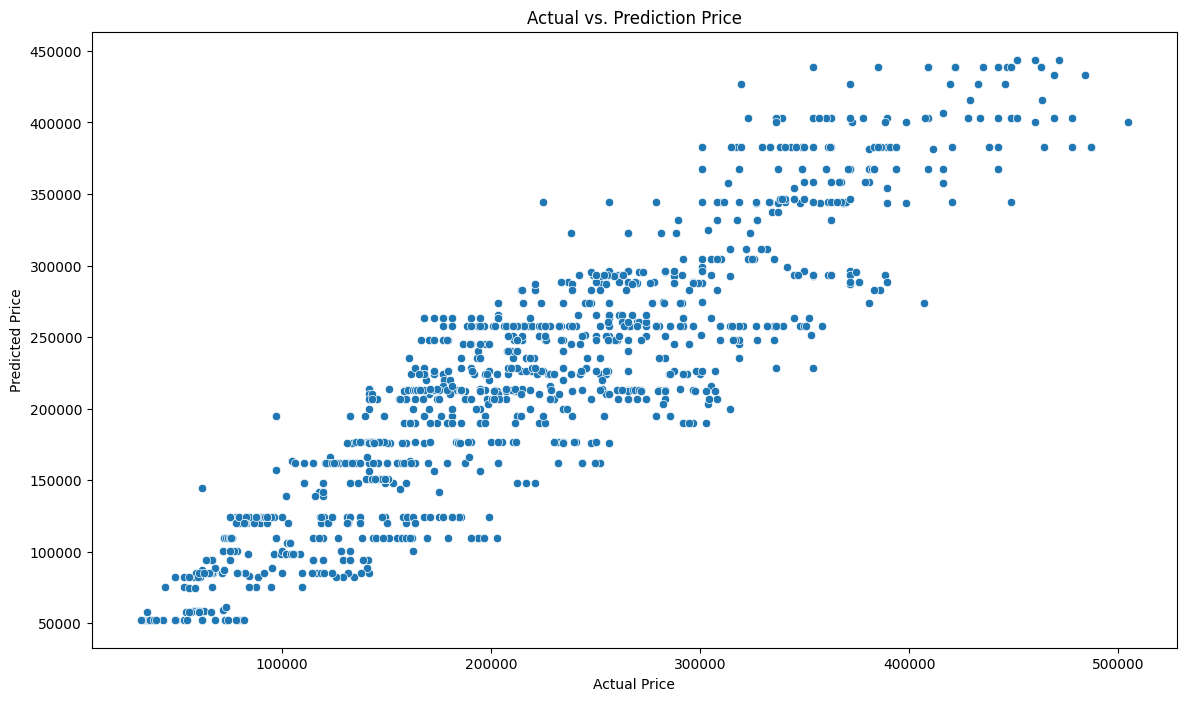

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

**Features Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

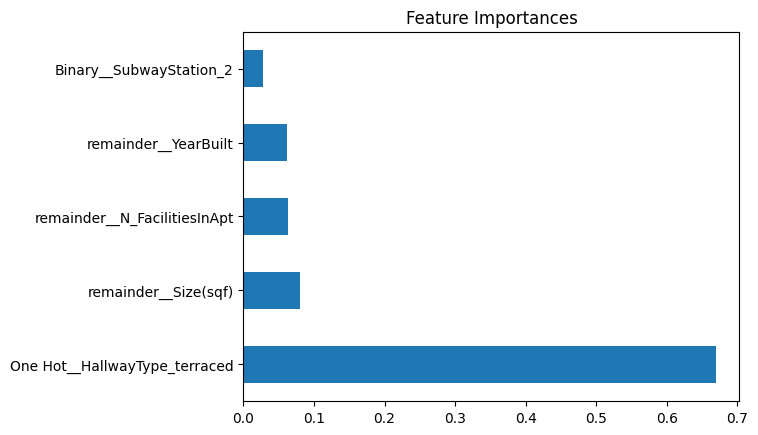

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

**Conclusion**

Berdasarkan hasil pemodelan, fitur yang paling mempengaruhi harga apartemen, yaitu:


*   HallwayType terraced
*   Size(sqf)

Metrik evaluasi yang digunakan untuk menilai performa model adalah RMSE, MAE, dan MAPE.

Berdasarkan nilai MAPE, model terbaik setelah hyperparameter tuning, yaitu sekitar 17-18% dapat disimpulkan bahwa prediksi harga apartemen baru akan meleset rata-rata sebesar 17-18% dari harga sebenarnya.

Prediksi model masih memiliki potensi kesalahan yang lebih besar karena keterbatasan fitur pada dataset, misalnya jumlah kamar, layanan tambahan, dan aspek properti lain yang tidak tercatat.

Meski demikian, model ini tetap dapat diperbaiki dan disempurnakan untuk manghasilkan prediksi yang lebih akurat. Salah satu pendekatan yang bisa dilakukan adalah A/B testing untuk mengukur efektivitas model dalam membantu estimasi harga apartemen serta memperoleh insight terkait fitur atau variabel tambahan yang perlu dimasukkan ke model.




**Recommendations**

**Rekomendasi Pengembangan Model Prediksi Harga Apartemen di Daegu**

1. Analisis error prediksi tinggi
  Mengecek prediksi mana saja yang memiliki error paling tinggi. Error ini bisa dikelompokkan menjadi overestimation dan underestimation, lalu dipilih 5% error paling ekstrim dari masing-masing grup. Dengan demikian, kita akan memiliki tiga group:overestimation(5%), underestimation(5%), dan mayoritas (90%) yang errornya mendekati nilai rata-rata. Selanjutnya, kita bisa mengecek hubungan antara error ini dengan masing-masing fitur, seperti HallwayType, Size (sqf), N_FacilitiesInApt, YearBuilt, dan SubwayStation, sehingga dapat diketahui fitur atau aspek mana yang menyebabkan model menghasilkan error tinggi. Hasil ini bisa digunakan untuk melakukan feature engineering dan training ulang model agar lebih akurat.


  2. Penambahan fitur yang lebih relevan
   Jika memungkinkan, penambahan fitur yang lebih korelatif dengan harga apartemen akan membantu meningkatkan performa model. Contohnya luas kamar, jumlah kamar mandi, atau jarak ke pusat kota Daegu.


   3. Pengembangan model turunan
     Model yang sudah dibangun bisa digunakan sebagai dasar untuk model lain, misalnya prediksi perubahan harga listing apartemen berdasarkan review atau rating penghuni. Jika data review tersedia, kita dapat melakukan sentiment analysis untuk menghasilkan skor-review yang bisa dimasukkan sebagai fitur tambahan. Nilai review yang didapat dapat dirata-ratakan per listing dan digunakan untuk memprediksi harga baru. Dengan cara ini, akurasi prediksi harga apartemen di Daegu bisa meningkat.